In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('assets/wave_height_hourly.csv')

In [3]:
data.head()

,time,SignificantWaveHeight
0,2016-01-01 00:00:00,6.085000
1,2016-01-01 01:00:00,5.989611
2,2016-01-01 02:00:00,5.494222
3,2016-01-01 03:00:00,5.170778
4,2016-01-01 04:00:00,5.362333


<AxesSubplot:xlabel='time'>

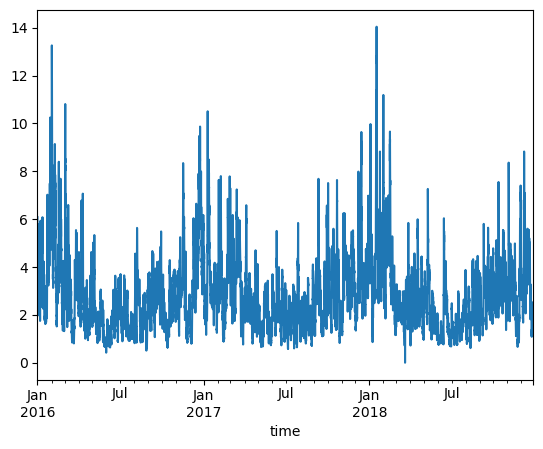

In [4]:
wave = pd.Series(data['SignificantWaveHeight'].values, index = pd.to_datetime(data['time']))
wave.plot()

In [5]:
from src.tde import UnivariateTDE

In [6]:
# prever os valores das próximas 12 horas com base nas últimas 6
wave_tde = UnivariateTDE(wave, horizon=12, k=6)
wave_tde.head()

,t-5,t-4,t-3,t-2,t-1,t-0,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722,4.524944


In [7]:
is_future = wave_tde.columns.str.contains('\+')
X = wave_tde.iloc[:,~is_future]
Y = wave_tde.iloc[:,is_future]

X.head()

,t-5,t-4,t-3,t-2,t-1,t-0
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167


In [8]:
Y.head()

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833
1,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778
2,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167
3,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722
4,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556,4.410111,4.598833,4.137778,4.292167,4.547722,4.524944


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [11]:
X_train.head()

,t-5,t-4,t-3,t-2,t-1,t-0
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167


In [12]:
X_test.head()

,t-5,t-4,t-3,t-2,t-1,t-0
18341,3.552167,3.541889,3.964444,4.112944,4.523222,4.740056
18342,3.541889,3.964444,4.112944,4.523222,4.740056,4.825611
18343,3.964444,4.112944,4.523222,4.740056,4.825611,5.104833
18344,4.112944,4.523222,4.740056,4.825611,5.104833,5.094222
18345,4.523222,4.740056,4.825611,5.104833,5.094222,5.382056


### Método Direto

In [13]:
# Abordagem direta
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

?MultiOutputRegressor

Init signature: MultiOutputRegressor(estimator, *, n_jobs=None)
Docstring:     
Multi target regression.

This strategy consists of fitting one regressor per target. This is a
simple strategy for extending regressors that do not natively support
multi-target regression.

.. versionadded:: 0.18

Parameters
----------
estimator : estimator object
    An estimator object implementing :term:`fit` and :term:`predict`.

n_jobs : int or None, optional (default=None)
    The number of jobs to run in parallel.
    :meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supported
    by the passed estimator) will be parallelized for each target.

    When individual estimators are fast to train or predict,
    using ``n_jobs > 1`` can result in slower performance due
    to the parallelism overhead.

    ``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all available processes / threads.
    See :term:`Glossary <n_jobs>` for more details.

    .. vers

In [14]:
model = MultiOutputRegressor(Ridge())

In [15]:
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=Ridge())

In [16]:
forecasts_direto = model.predict(X_test)
print(forecasts_direto[:5])
forecasts_direto = pd.DataFrame(forecasts_direto, columns = Y_test.columns)
forecasts_direto.head()

[[4.84987572 4.94977756 5.01943931 5.05059216 5.05843869 5.05736759
  5.04994547 5.04004977 5.03554124 5.02064107 5.00414521 4.98072992]
 [4.92405096 4.98876836 5.01597078 5.02216083 5.02224657 5.01711283
  5.01024742 5.00501879 4.99006298 4.97407665 4.94877225 4.9138288 ]
 [5.16906583 5.22653751 5.26040096 5.27800698 5.27405679 5.26424562
  5.25216344 5.23842368 5.22293871 5.19691634 5.1679214  5.13930029]
 [5.15527947 5.17846411 5.18512404 5.17198838 5.15826109 5.1431228
  5.12672194 5.11207832 5.08648448 5.05693899 5.02880384 4.98685692]
 [5.40396034 5.44817731 5.46970369 5.47843528 5.46569819 5.44652951
  5.42459968 5.40034737 5.37094383 5.34209857 5.30687903 5.27182182]]


,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,4.849876,4.949778,5.019439,5.050592,5.058439,5.057368,5.049945,5.040050,5.035541,5.020641,5.004145,4.980730
1,4.924051,4.988768,5.015971,5.022161,5.022247,5.017113,5.010247,5.005019,4.990063,4.974077,4.948772,4.913829
2,5.169066,5.226538,5.260401,5.278007,5.274057,5.264246,5.252163,5.238424,5.222939,5.196916,5.167921,5.139300
3,5.155279,5.178464,5.185124,5.171988,5.158261,5.143123,5.126722,5.112078,5.086484,5.056939,5.028804,4.986857
4,5.403960,5.448177,5.469704,5.478435,5.465698,5.446530,5.424600,5.400347,5.370944,5.342099,5.306879,5.271822


In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
error_by_horizon_dir = {}
for h in Y_test.columns:
    error_by_horizon_dir[h] = mean_absolute_error(Y_test[h], forecasts_direto[h])
    
error_by_horizon_dir

{'t+1': 0.10787859514345607,
 't+2': 0.15418576124898195,
 't+3': 0.20098732514050208,
 't+4': 0.249123893647253,
 't+5': 0.2935710267060966,
 't+6': 0.33646008554931556,
 't+7': 0.37558343778887426,
 't+8': 0.4115406718091448,
 't+9': 0.4440498659988669,
 't+10': 0.47373459183128314,
 't+11': 0.502072109325967,
 't+12': 0.5281861500509741}

<AxesSubplot:>

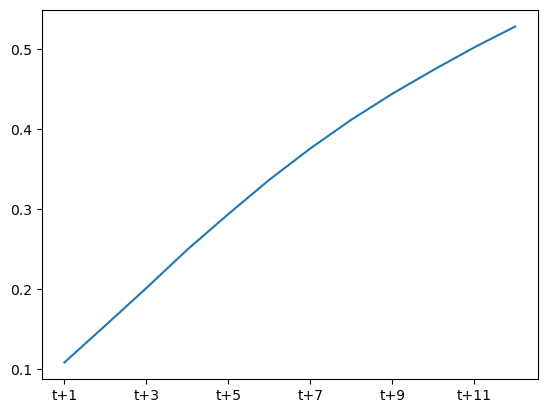

In [19]:
pd.Series(error_by_horizon_dir).plot()

### Método Recursivo

In [20]:
model = Ridge()
print(Y_train['t+1'].head())
model.fit(X_train, Y_train['t+1'])

0    5.110222
1    4.856111
2    5.071167
3    4.984167
4    5.418722
Name: t+1, dtype: float64


Ridge()

In [21]:
Y_hat = pd.DataFrame(np.zeros((X_test.shape[0], 12)), columns=Y_train.columns)
Y_hat.head()

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
yh = model.predict(X_test)
Y_hat['t+1'] = yh

X_ = X_test.copy()
for i in range(2, 12 + 1):
    print('Antes')
    print(X_.head(3))
    X_.iloc[:, :-1] = X_.iloc[:, 1:].values
    X_['t-0'] = yh
    print('Depois')
    print(X_.head(3))

    yh = model.predict(X_)

    Y_hat[f't+{i}'] = yh

Antes
            t-5       t-4       t-3       t-2       t-1       t-0
18341  3.552167  3.541889  3.964444  4.112944  4.523222  4.740056
18342  3.541889  3.964444  4.112944  4.523222  4.740056  4.825611
18343  3.964444  4.112944  4.523222  4.740056  4.825611  5.104833
Depois
            t-5       t-4       t-3       t-2       t-1       t-0
18341  3.541889  3.964444  4.112944  4.523222  4.740056  4.849876
18342  3.964444  4.112944  4.523222  4.740056  4.825611  4.924051
18343  4.112944  4.523222  4.740056  4.825611  5.104833  5.169066
Antes
            t-5       t-4       t-3       t-2       t-1       t-0
18341  3.541889  3.964444  4.112944  4.523222  4.740056  4.849876
18342  3.964444  4.112944  4.523222  4.740056  4.825611  4.924051
18343  4.112944  4.523222  4.740056  4.825611  5.104833  5.169066
Depois
            t-5       t-4       t-3       t-2       t-1       t-0
18341  3.964444  4.112944  4.523222  4.740056  4.849876  4.947535
18342  4.112944  4.523222  4.740056  4.825611  4.9

In [23]:
Y_hat.head()

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,4.849876,4.947535,5.021199,5.056436,5.073264,5.078059,5.071126,5.055264,5.033632,5.007567,4.978137,4.946393
1,4.924051,4.994102,5.025829,5.040026,5.043970,5.036049,5.019615,4.997777,4.971740,4.942461,4.911003,4.878078
2,5.169066,5.227714,5.268063,5.291608,5.290030,5.280955,5.263372,5.238877,5.209384,5.176809,5.141749,5.105001
3,5.155279,5.184483,5.197201,5.187508,5.175807,5.155178,5.128921,5.098790,5.066303,5.031706,4.995841,4.959210
4,5.403960,5.450449,5.473562,5.486448,5.473775,5.456749,5.431957,5.401404,5.366539,5.329273,5.289963,5.249352


In [24]:
error_by_horizon_rec = {}
for h in Y_test.columns:
    error_by_horizon_rec[h] = mean_absolute_error(Y_test[h], Y_hat[h])
    
error_by_horizon_rec

{'t+1': 0.10787859514345607,
 't+2': 0.15420278546708202,
 't+3': 0.20114988241789655,
 't+4': 0.2494439531104109,
 't+5': 0.2940762244921021,
 't+6': 0.33692096210957834,
 't+7': 0.3759925292921352,
 't+8': 0.41183284746777477,
 't+9': 0.444070602747288,
 't+10': 0.4736102834692962,
 't+11': 0.5019834259207638,
 't+12': 0.5280404482952434}

In [25]:
pd.Series(error_by_horizon_rec).mean()

0.33993354499441897

In [26]:
pd.Series(error_by_horizon_dir).mean()

0.3397811261867263

### Método Direto-Recursivo (DirRec)

In [27]:
from sklearn.multioutput import RegressorChain

?RegressorChain

model = RegressorChain(Ridge())
model.fit(X_train, Y_train)

RegressorChain(base_estimator=Ridge())

Init signature: RegressorChain(base_estimator, *, order=None, cv=None, random_state=None)
Docstring:     
A multi-label model that arranges regressions into a chain.

Each model makes a prediction in the order specified by the chain using
all of the available features provided to the model plus the predictions
of models that are earlier in the chain.

Read more in the :ref:`User Guide <regressorchain>`.

.. versionadded:: 0.20

Parameters
----------
base_estimator : estimator
    The base estimator from which the classifier chain is built.

order : array-like of shape (n_outputs,) or 'random', default=None
    If `None`, the order will be determined by the order of columns in
    the label matrix Y.::

        order = [0, 1, 2, ..., Y.shape[1] - 1]

    The order of the chain can be explicitly set by providing a list of
    integers. For example, for a chain of length 5.::

        order = [1, 3, 2, 4, 0]

    means that the first model in the chain will make predictions for
    column

In [28]:
forecasts_dr = model.predict(X_test)
forecasts_dr = pd.DataFrame(forecasts_dr, columns = Y_test.columns)
forecasts_dr.head()

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,4.849876,4.949778,5.019439,5.050592,5.058439,5.057368,5.049945,5.040050,5.035541,5.020641,5.004145,4.980730
1,4.924051,4.988768,5.015971,5.022161,5.022247,5.017113,5.010247,5.005019,4.990063,4.974077,4.948772,4.913829
2,5.169066,5.226538,5.260401,5.278007,5.274057,5.264246,5.252163,5.238424,5.222939,5.196916,5.167921,5.139300
3,5.155279,5.178464,5.185124,5.171988,5.158261,5.143123,5.126722,5.112078,5.086484,5.056939,5.028804,4.986857
4,5.403960,5.448177,5.469704,5.478435,5.465698,5.446530,5.424600,5.400347,5.370944,5.342099,5.306879,5.271822


In [29]:
error_by_horizon_dr = {}
for h in Y_test.columns:
    error_by_horizon_dr[h] = mean_absolute_error(Y_test[h], forecasts_dr[h])
    
error_by_horizon_dr

{'t+1': 0.10787859514345607,
 't+2': 0.15418576124898142,
 't+3': 0.20098732514050113,
 't+4': 0.2491238936472524,
 't+5': 0.2935710267060947,
 't+6': 0.3364600855493145,
 't+7': 0.3755834377888733,
 't+8': 0.41154067180914033,
 't+9': 0.4440498659988624,
 't+10': 0.4737345918312792,
 't+11': 0.5020721093259609,
 't+12': 0.5281861500509674}

In [30]:
# pd.Series(error_by_horizon_dr)
pd.Series(error_by_horizon_dr).mean()

0.3397811261867236

### Método Multi-output

In [31]:
from sklearn.neighbors import KNeighborsRegressor
model_mo = KNeighborsRegressor()
model_mo.fit(X_train, Y_train)

KNeighborsRegressor()

In [32]:
forecasts_mo = model_mo.predict(X_test)
forecasts_mo = pd.DataFrame(forecasts_mo, columns = Y_test.columns)
forecasts_mo.head()

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,4.796311,4.720567,4.657133,4.577489,4.524089,4.493978,4.552067,4.338300,4.416444,4.403644,4.207656,4.142678
1,4.803511,4.958114,4.928978,4.873222,4.960500,5.078933,5.108611,5.210056,5.296522,5.128133,5.263778,5.341078
2,5.249711,5.517856,5.669600,5.880451,5.773867,6.016089,5.802384,5.626593,5.399278,5.629561,5.687667,5.763067
3,5.393000,5.410900,5.571700,5.854900,5.455122,5.725611,5.653533,5.658068,5.917711,5.875711,5.855733,5.789889
4,5.325831,5.593959,6.352611,6.135800,6.567278,6.476111,6.445212,6.613736,6.825022,6.442956,6.286078,6.112467


In [33]:
error_by_horizon_mo = {}
for h in Y_test.columns:
    error_by_horizon_mo[h] = mean_absolute_error(Y_test[h], forecasts_mo[h])
    
error_by_horizon_mo

{'t+1': 0.11989616595114469,
 't+2': 0.16785583025280268,
 't+3': 0.2175525263629692,
 't+4': 0.26777411395022227,
 't+5': 0.31668913212987826,
 't+6': 0.36309638941721967,
 't+7': 0.4061012168457281,
 't+8': 0.44405159848245374,
 't+9': 0.4805470251888136,
 't+10': 0.5113415670260136,
 't+11': 0.5404724136410329,
 't+12': 0.5685720574206101}

In [34]:
pd.Series(error_by_horizon_mo).mean()

0.366995836389074

In [35]:
print(f'Erro Direto: {pd.Series(error_by_horizon_dir).mean()}')
print(f'Erro Recursivo: {pd.Series(error_by_horizon_rec).mean()}')
print(f'Erro Direto-Recursivo: {pd.Series(error_by_horizon_dr).mean()}')
print(f'Erro Multi-output: {pd.Series(error_by_horizon_mo).mean()}')

Erro Direto: 0.3397811261867263
Erro Recursivo: 0.33993354499441897
Erro Direto-Recursivo: 0.3397811261867236
Erro Multi-output: 0.366995836389074
